# Unidad 6 - Ajustes y modelos 1

**Ejercicio N° 1**

En un análisis de calidad de un producto alimenticio de un determinado laboratorio se desea conocer la relación entre el tiempo de exposición, de una misma cantidad de producto, a una temperatura de 180° y el número de bacterias sobrevivientes. Para ello se realizó un experimento en 12 observaciones de diferentes tiempos de exposición donde se observó la cantidad de bacterias sobrevivientes.

Proponga  un análisis exploratorio de los datos y comente la relación que se puede observar entre las variables. ¿Es posible ajustar un modelo de regresión simple entre estas variables?

De ser así indique cual sería el modelo propuesto en relación al problema que busca modelizar y ajustelo con las librerías propuestas en clase. Proponga un analisis de residuos.  Y explique las salidas del modelo (coeficientes, R2, y lo que le parezca pertinente).

Escriba sus conclusiones al respecto

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("/content/bacterias.csv", sep=';')
df

,ID,bacterias_vivas,segundos
0,85,16,11
1,125,50,6
2,106,71,5
3,118,11,12
4,72,95,3
5,19,175,1
6,65,31,8
7,69,82,4
8,74,108,2
9,101,49,7


In [18]:
df.columns = ['ID','bacterias_vivas','segundos']

<Axes: xlabel='segundos', ylabel='bacterias_vivas'>

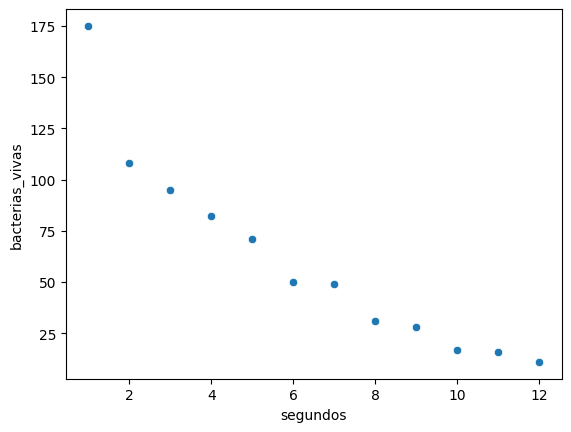

In [19]:
sns.scatterplot(df, x=df['segundos'], y=df['bacterias_vivas'])

<Axes: >

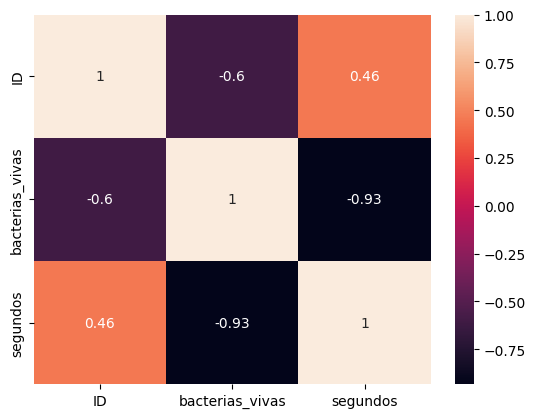

In [21]:
sns.heatmap(df.corr(), annot=True)

In [30]:
df['bacterias_log'] = np.log(df['bacterias_vivas'])

<Axes: xlabel='segundos', ylabel='bacterias_log'>

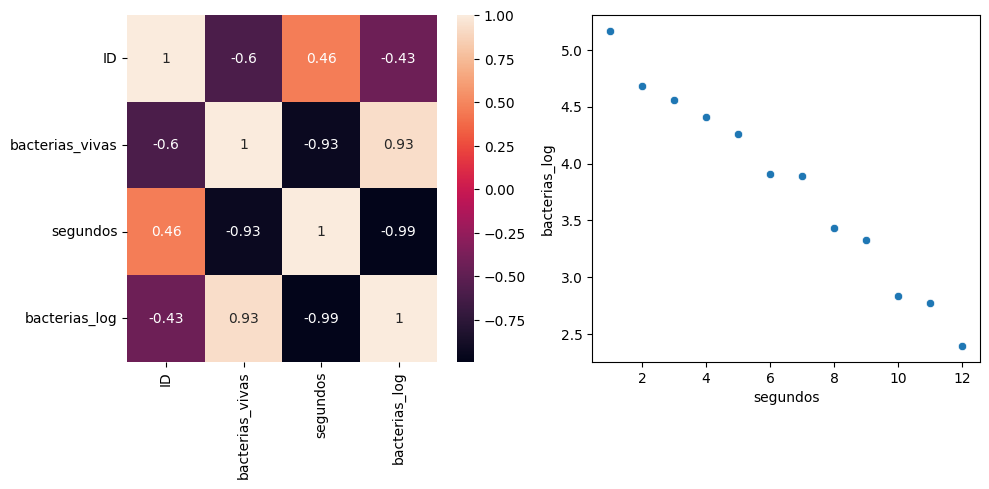

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(11,4.5))
sns.heatmap(df.corr(), annot=True, ax=axes[0])
sns.scatterplot(df, x=df['segundos'], y=df['bacterias_log'], ax=axes[1])

In [34]:
pip install statsmodels

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_white, jarque_bera
from statsmodels.stats.outliers_influence import OLSInfluence
import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Datos del problema
data = {
    'ID': [85, 125, 106, 118, 72, 19, 65, 69, 74, 101, 57, 94],
    'bacterias_vivas': [16, 50, 71, 11, 95, 175, 31, 82, 108, 49, 17, 28],
    'segundos': [11, 6, 5, 12, 3, 1, 8, 4, 2, 7, 10, 9]
}

df = pd.DataFrame(data)

print("="*60)
print("ANÁLISIS DE SUPERVIVENCIA BACTERIANA")
print("="*60)
print("\n1. DATOS ORIGINALES")
print("-"*30)
print(df)
print(f"\nDescriptivos básicos:")
print(df.describe())

# =====================================
# 2. ANÁLISIS EXPLORATORIO
# =====================================

print("\n\n2. ANÁLISIS EXPLORATORIO")
print("-"*30)

# Correlación inicial
corr_original = df['bacterias_vivas'].corr(df['segundos'])
print(f"Correlación original (bacterias vs segundos): {corr_original:.4f}")

# Gráficos exploratorios
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Dispersión original
axes[0,0].scatter(df['segundos'], df['bacterias_vivas'], color='red', s=80, alpha=0.7)
axes[0,0].set_xlabel('Tiempo de exposición (segundos)')
axes[0,0].set_ylabel('Bacterias vivas')
axes[0,0].set_title('Relación Original: Bacterias vs Tiempo')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Ajuste polinomial para visualizar tendencia
z = np.polyfit(df['segundos'], df['bacterias_vivas'], 2)
p = np.poly1d(z)
x_smooth = np.linspace(df['segundos'].min(), df['segundos'].max(), 100)
axes[0,0].plot(x_smooth, p(x_smooth), "r--", alpha=0.8, linewidth=2)

# Gráfico 3: Distribuciones
axes[0,1].hist(df['bacterias_vivas'], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_xlabel('Bacterias vivas')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].set_title('Distribución de Bacterias Vivas')

axes[1,0].hist(df['segundos'], bins=8, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_xlabel('Segundos de exposición')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución del Tiempo de Exposición')

plt.tight_layout()
plt.show()

# =====================================
# 3. TRANSFORMACIÓN LOGARÍTMICA
# =====================================

print("\n\n3. TRANSFORMACIÓN LOGARÍTMICA")
print("-"*30)

# Aplicar transformación logarítmica
df['ln_bacterias'] = np.log(df['bacterias_vivas'])

print("Datos transformados:")
print(df[['segundos', 'bacterias_vivas', 'ln_bacterias']].round(4))

# Nueva correlación
corr_transformada = df['ln_bacterias'].corr(df['segundos'])
print(f"\nCorrelación después de transformación ln: {corr_transformada:.4f}")
print(f"Mejora en la correlación: {abs(corr_transformada) - abs(corr_original):.4f}")

# Gráfico de la transformación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Datos originales
ax1.scatter(df['segundos'], df['bacterias_vivas'], color='red', s=80, alpha=0.7)
ax1.set_xlabel('Tiempo (segundos)')
ax1.set_ylabel('Bacterias vivas')
ax1.set_title('Datos Originales')
ax1.grid(True, alpha=0.3)

# Datos transformados
ax2.scatter(df['segundos'], df['ln_bacterias'], color='blue', s=80, alpha=0.7)
ax2.set_xlabel('Tiempo (segundos)')
ax2.set_ylabel('ln(Bacterias vivas)')
ax2.set_title('Datos Transformados (Logarítmicos)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =====================================
# 4. AJUSTE DEL MODELO CON STATSMODELS
# =====================================

print("\n\n4. AJUSTE DEL MODELO DE REGRESIÓN")
print("-"*30)

# Modelo 1: Regresión lineal simple con datos originales
print("MODELO 1: Regresión Lineal Simple (datos originales)")
modelo1 = smf.ols('bacterias_vivas ~ segundos', data=df).fit()
print(modelo1.summary())

print("\n" + "="*50)
print("MODELO 2: Regresión con transformación logarítmica")
print("="*50)

# Modelo 2: Regresión con transformación logarítmica (MODELO PRINCIPAL)
modelo2 = smf.ols('ln_bacterias ~ segundos', data=df).fit()
print(modelo2.summary())

# =====================================
# 5. INTERPRETACIÓN DE COEFICIENTES
# =====================================

print("\n\n5. INTERPRETACIÓN DE COEFICIENTES")
print("-"*30)

intercept = modelo2.params['Intercept']
slope = modelo2.params['segundos']
r_squared = modelo2.rsquared
r_squared_adj = modelo2.rsquared_adj

print(f"Intercepto (ln(N₀)): {intercept:.4f}")
print(f"N₀ estimado (bacterias iniciales): {np.exp(intercept):.2f}")
print(f"Pendiente (constante de mortalidad k): {slope:.4f}")
print(f"R²: {r_squared:.4f}")
print(f"R² ajustado: {r_squared_adj:.4f}")

# Interpretación biológica
print(f"\nINTERPRETACIÓN BIOLÓGICA:")
print(f"- Cada segundo adicional reduce las bacterias en un factor de {np.exp(slope):.4f}")
print(f"- Supervivencia por segundo: {np.exp(slope)*100:.2f}%")
print(f"- Tiempo de vida media: {-np.log(0.5)/(-slope):.2f} segundos")

# =====================================
# 6. ANÁLISIS DE RESIDUOS
# =====================================

print("\n\n6. ANÁLISIS DE RESIDUOS")
print("-"*30)

# Calcular residuos y valores ajustados
residuos = modelo2.resid
valores_ajustados = modelo2.fittedvalues
residuos_estudentizados = modelo2.get_influence().resid_studentized_external

# Tests estadísticos
jb_stat, jb_pvalue = jarque_bera(residuos)
_, white_pvalue, _, _ = het_white(residuos, modelo2.model.exog)

print(f"Test de Jarque-Bera (Normalidad):")
print(f"  Estadístico: {jb_stat:.4f}, p-valor: {jb_pvalue:.4f}")
print(f"  {'✓ Residuos normales' if jb_pvalue > 0.05 else '✗ Residuos no normales'}")

print(f"\nTest de White (Homocedasticidad):")
print(f"  p-valor: {white_pvalue:.4f}")
print(f"  {'✓ Homocedasticidad' if white_pvalue > 0.05 else '✗ Heterocedasticidad'}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuos vs Valores ajustados
axes[0,0].scatter(valores_ajustados, residuos, alpha=0.7)
axes[0,0].axhline(y=0, color='red', linestyle='--')
axes[0,0].set_xlabel('Valores Ajustados')
axes[0,0].set_ylabel('Residuos')
axes[0,0].set_title('Residuos vs Valores Ajustados')
axes[0,0].grid(True, alpha=0.3)

# 2. Q-Q plot para normalidad
stats.probplot(residuos, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot (Normalidad de Residuos)')
axes[0,1].grid(True, alpha=0.3)

# 3. Residuos vs Variable independiente
axes[1,0].scatter(df['segundos'], residuos, alpha=0.7, color='green')
axes[1,0].axhline(y=0, color='red', linestyle='--')
axes[1,0].set_xlabel('Segundos')
axes[1,0].set_ylabel('Residuos')
axes[1,0].set_title('Residuos vs Tiempo')
axes[1,0].grid(True, alpha=0.3)

# 4. Histograma de residuos
axes[1,1].hist(residuos, bins=8, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_xlabel('Residuos')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].set_title('Distribución de Residuos')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =====================================
# 7. PREDICCIONES Y VISUALIZACIÓN FINAL
# =====================================

print("\n\n7. MODELO FINAL Y PREDICCIONES")
print("-"*30)

# Crear datos para la curva suavizada
x_pred = np.linspace(1, 12, 100)
X_pred = sm.add_constant(x_pred)

# Predicciones en escala logarítmica
y_pred_log = modelo2.predict(X_pred)

# Convertir a escala original
y_pred_original = np.exp(y_pred_log)

# Intervalos de confianza
pred_summary = modelo2.get_prediction(X_pred)
ci_lower_log = pred_summary.summary_frame()['mean_ci_lower']
ci_upper_log = pred_summary.summary_frame()['mean_ci_upper']

# Convertir intervalos a escala original
ci_lower_original = np.exp(ci_lower_log)
ci_upper_original = np.exp(ci_upper_log)

# Gráfico final
plt.figure(figsize=(12, 8))
plt.scatter(df['segundos'], df['bacterias_vivas'], color='red', s=100, alpha=0.8,
           label='Datos observados', zorder=5)
plt.plot(x_pred, y_pred_original, 'b-', linewidth=3, label='Modelo ajustado')
plt.fill_between(x_pred, ci_lower_original, ci_upper_original, alpha=0.2,
                color='blue', label='Intervalo de confianza 95%')

plt.xlabel('Tiempo de exposición (segundos)', fontsize=12)
plt.ylabel('Bacterias vivas', fontsize=12)
plt.title('Modelo de Supervivencia Bacteriana\nN(t) = N₀ × e^(-kt)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Agregar ecuación en el gráfico
equation = f'ln(N) = {intercept:.3f} - {abs(slope):.3f}t\nR² = {r_squared:.3f}'
plt.text(0.02, 0.98, equation, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# =====================================
# 8. CONCLUSIONES
# =====================================

print("\n\n8. CONCLUSIONES")
print("="*50)
print(f"""
RESULTADOS DEL ANÁLISIS:

1. MODELO AJUSTADO:
   - Ecuación: ln(Bacterias) = {intercept:.3f} {slope:.3f} × Tiempo
   - En escala original: Bacterias = {np.exp(intercept):.1f} × exp({slope:.3f} × Tiempo)
   - R² = {r_squared:.3f} ({r_squared*100:.1f}% de la varianza explicada)

2. INTERPRETACIÓN BIOLÓGICA:
   - Número inicial estimado de bacterias: {np.exp(intercept):.0f}
   - Tasa de mortalidad: {abs(slope):.4f} por segundo
   - Supervivencia por segundo: {np.exp(slope)*100:.1f}%
   - Tiempo de vida media: {-np.log(0.5)/(-slope):.1f} segundos

3. VALIDEZ DEL MODELO:
   - {'✓' if jb_pvalue > 0.05 else '✗'} Normalidad de residuos (p = {jb_pvalue:.3f})
   - {'✓' if white_pvalue > 0.05 else '✗'} Homocedasticidad (p = {white_pvalue:.3f})
   - {'✓' if r_squared > 0.7 else '✗'} Buen ajuste (R² > 0.7)

4. CONCLUSIÓN FINAL:
   El modelo exponencial de decaimiento es {'ADECUADO' if r_squared > 0.7 and jb_pvalue > 0.05 else 'PARCIALMENTE ADECUADO'}
   para explicar la supervivencia bacteriana bajo estrés térmico.
   La transformación logarítmica permitió linearizar la relación exponencial.
""")

# Ejemplo de predicción
tiempo_ejemplo = 15
pred_log = modelo2.predict([1, tiempo_ejemplo])
pred_bacterias = np.exp(pred_log[0])
print(f"\nEJEMPLO DE PREDICCIÓN:")
print(f"Para t = {tiempo_ejemplo} segundos: ~{pred_bacterias:.0f} bacterias sobrevivientes")

ImportError: cannot import name 'jarque_bera' from 'statsmodels.stats.diagnostic' (/usr/local/lib/python3.11/dist-packages/statsmodels/stats/diagnostic.py)

ANÁLISIS DE SUPERVIVENCIA BACTERIANA

1. DATOS ORIGINALES
------------------------------
     ID  bacterias_vivas  segundos
0    85               16        11
1   125               50         6
2   106               71         5
3   118               11        12
4    72               95         3
5    19              175         1
6    65               31         8
7    69               82         4
8    74              108         2
9   101               49         7
10   57               17        10
11   94               28         9

Descriptivos básicos:
               ID  bacterias_vivas   segundos
count   12.000000        12.000000  12.000000
mean    82.083333        61.083333   6.500000
std     29.311674        48.257752   3.605551
min     19.000000        11.000000   1.000000
25%     68.000000        25.250000   3.750000
50%     79.500000        49.500000   6.500000
75%    102.250000        85.250000   9.250000
max    125.000000       175.000000  12.000000


2. ANÁLISIS EXPLO

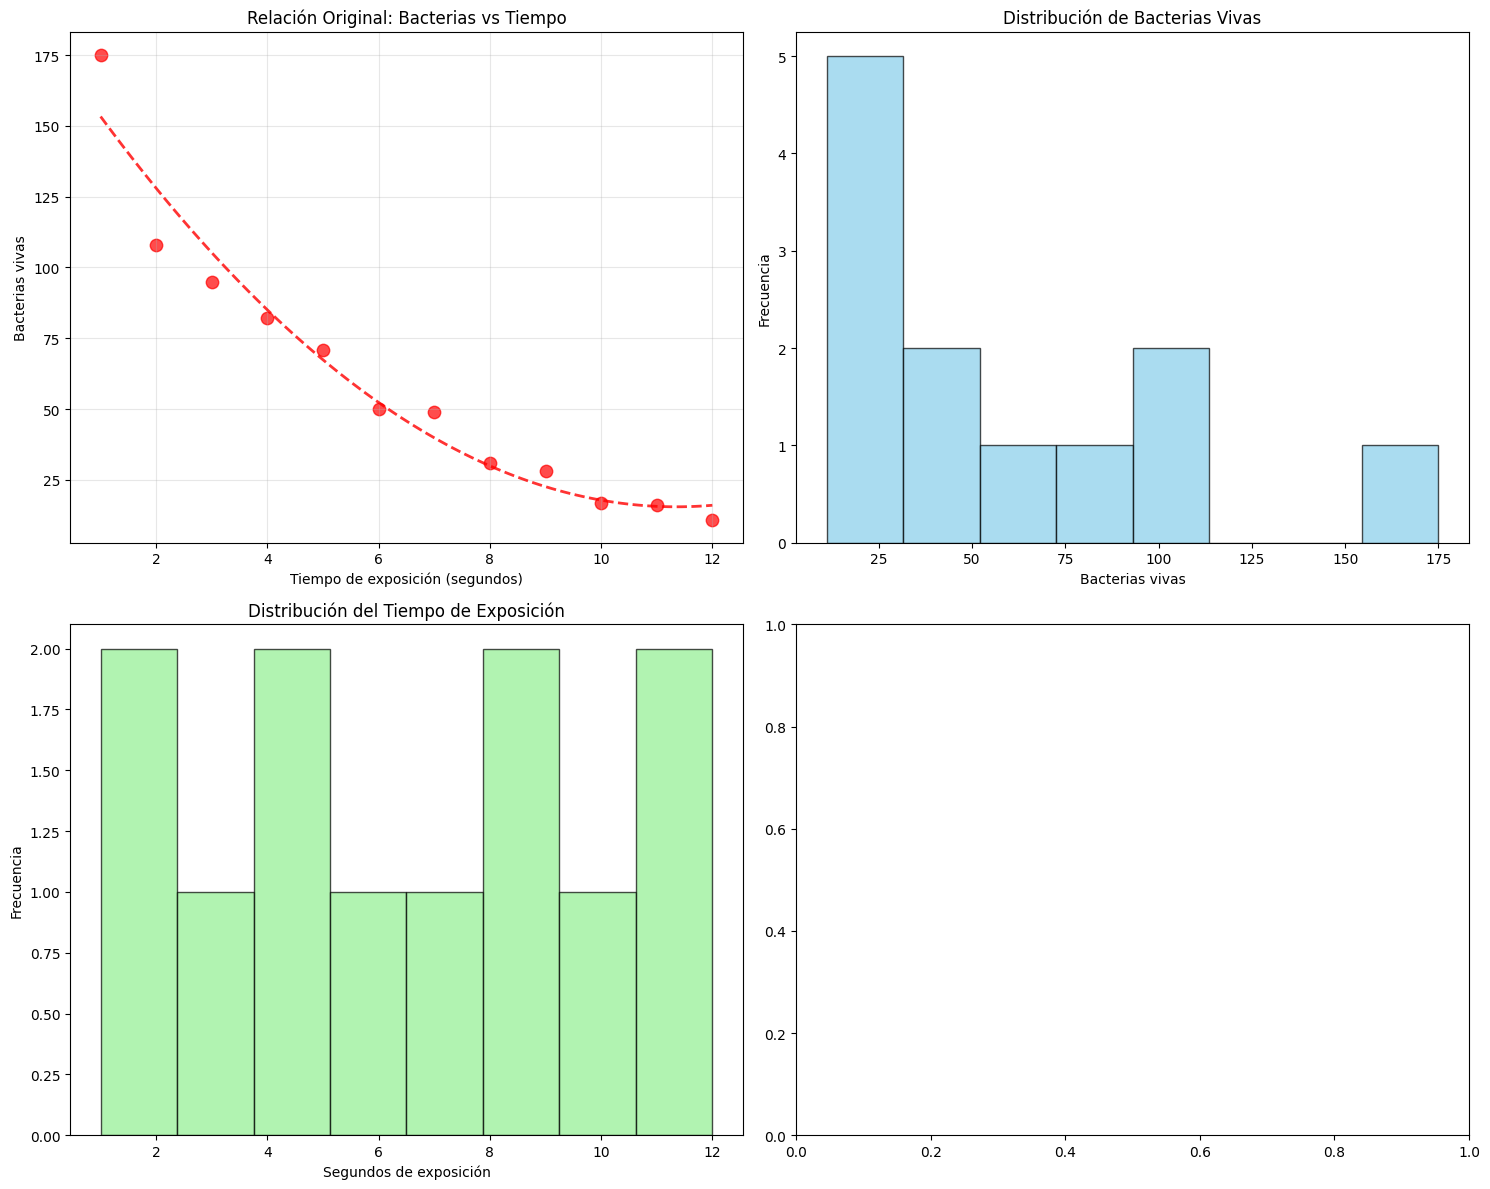



3. TRANSFORMACIÓN LOGARÍTMICA
------------------------------
Datos transformados:
    segundos  bacterias_vivas  ln_bacterias
0         11               16        2.7726
1          6               50        3.9120
2          5               71        4.2627
3         12               11        2.3979
4          3               95        4.5539
5          1              175        5.1648
6          8               31        3.4340
7          4               82        4.4067
8          2              108        4.6821
9          7               49        3.8918
10        10               17        2.8332
11         9               28        3.3322

Correlación después de transformación ln: -0.9910
Mejora en la correlación: 0.0587


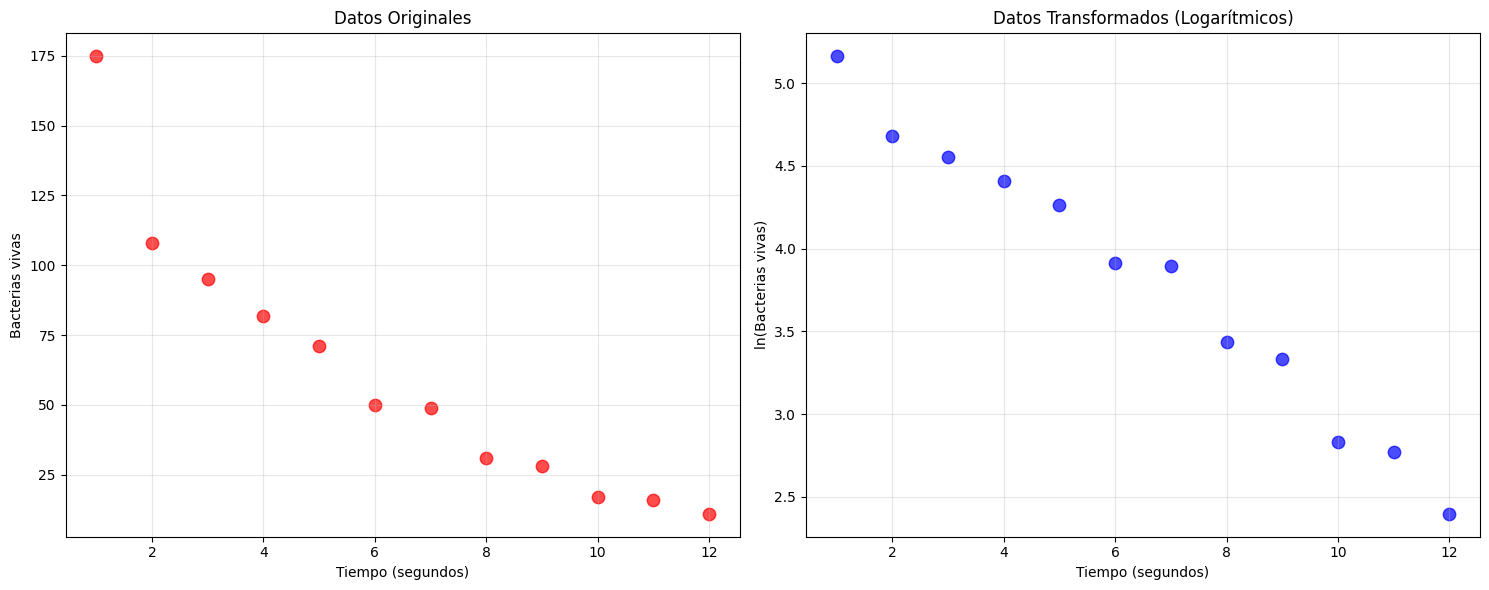



4. AJUSTE DEL MODELO DE REGRESIÓN
------------------------------
MODELO 1: Regresión Lineal Simple (datos originales)
                            OLS Regression Results                            
Dep. Variable:        bacterias_vivas   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     66.51
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           9.94e-06
Time:                        16:56:21   Log-Likelihood:                -50.815
No. Observations:                  12   AIC:                             105.6
Df Residuals:                      10   BIC:                             106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

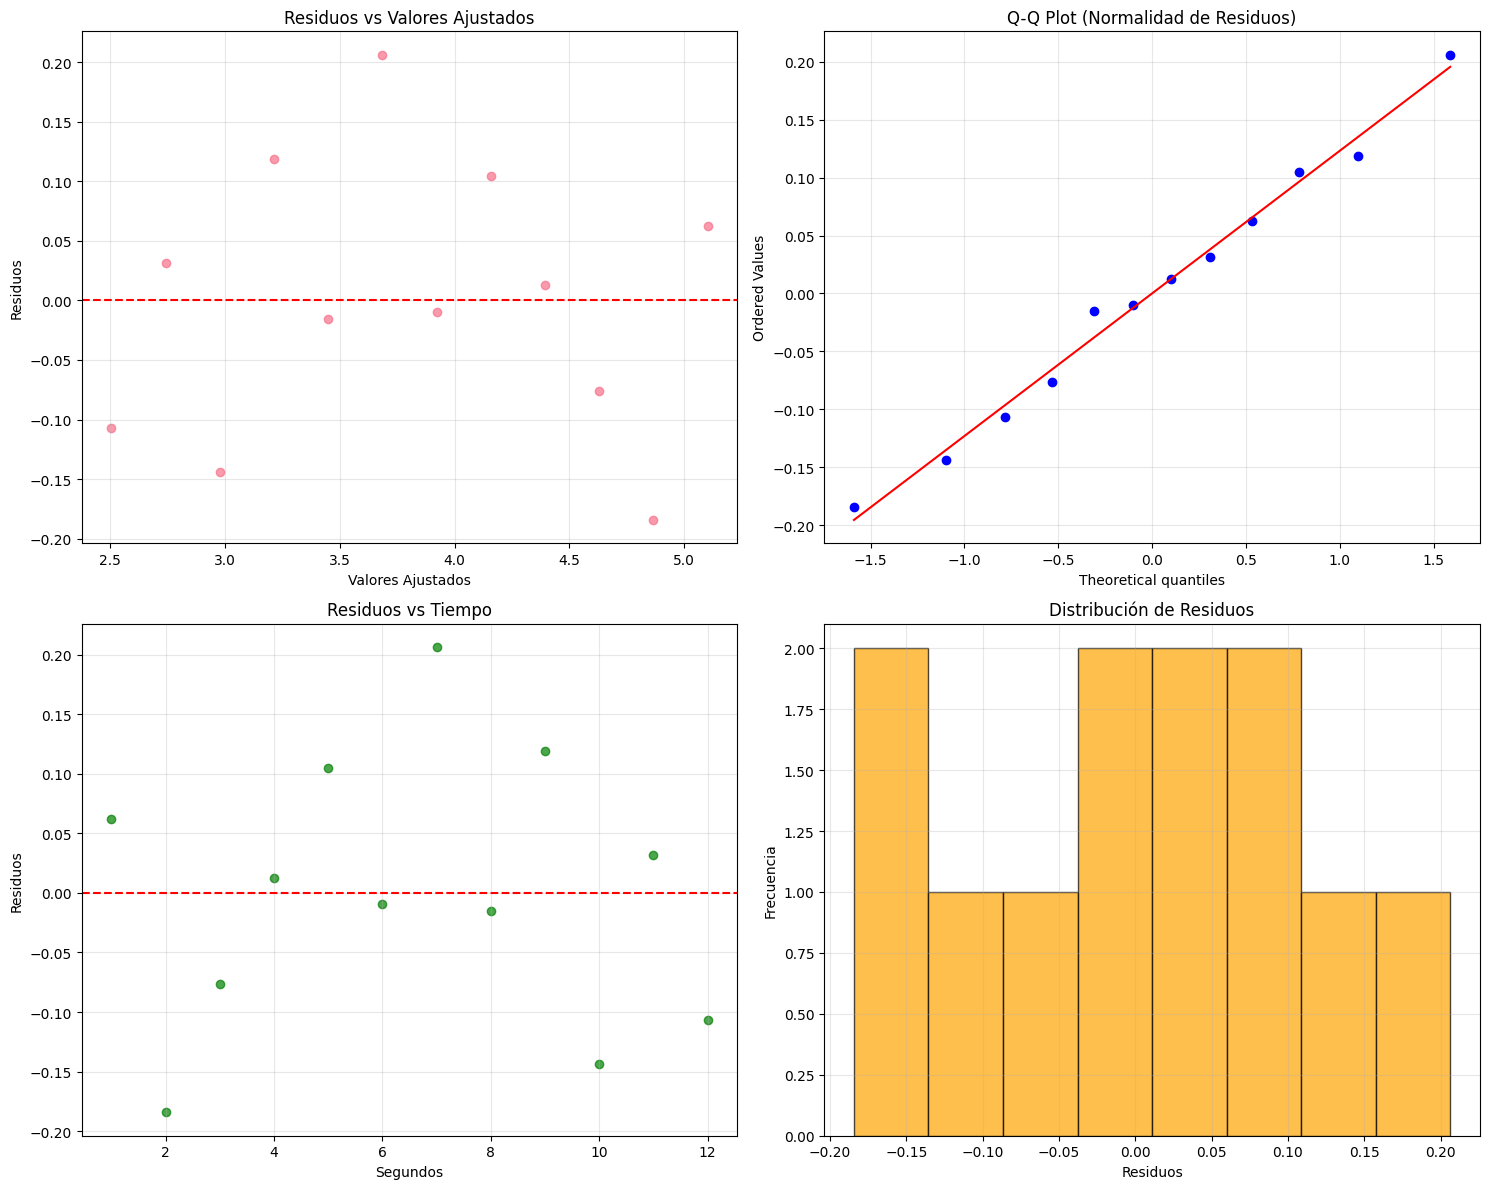



7. MODELO FINAL Y PREDICCIONES
------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import OLSInfluence
import warnings
warnings.filterwarnings('ignore')

# Configuración de gráficos
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_palette("husl")

# Datos del problema
data = {
    'ID': [85, 125, 106, 118, 72, 19, 65, 69, 74, 101, 57, 94],
    'bacterias_vivas': [16, 50, 71, 11, 95, 175, 31, 82, 108, 49, 17, 28],
    'segundos': [11, 6, 5, 12, 3, 1, 8, 4, 2, 7, 10, 9]
}

df = pd.DataFrame(data)

print("="*60)
print("ANÁLISIS DE SUPERVIVENCIA BACTERIANA")
print("="*60)
print("\n1. DATOS ORIGINALES")
print("-"*30)
print(df)
print(f"\nDescriptivos básicos:")
print(df.describe())

# =====================================
# 2. ANÁLISIS EXPLORATORIO
# =====================================

print("\n\n2. ANÁLISIS EXPLORATORIO")
print("-"*30)

# Correlación inicial
corr_original = df['bacterias_vivas'].corr(df['segundos'])
print(f"Correlación original (bacterias vs segundos): {corr_original:.4f}")

# Gráficos exploratorios
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Dispersión original
axes[0,0].scatter(df['segundos'], df['bacterias_vivas'], color='red', s=80, alpha=0.7)
axes[0,0].set_xlabel('Tiempo de exposición (segundos)')
axes[0,0].set_ylabel('Bacterias vivas')
axes[0,0].set_title('Relación Original: Bacterias vs Tiempo')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Ajuste polinomial para visualizar tendencia
z = np.polyfit(df['segundos'], df['bacterias_vivas'], 2)
p = np.poly1d(z)
x_smooth = np.linspace(df['segundos'].min(), df['segundos'].max(), 100)
axes[0,0].plot(x_smooth, p(x_smooth), "r--", alpha=0.8, linewidth=2)

# Gráfico 3: Distribuciones
axes[0,1].hist(df['bacterias_vivas'], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_xlabel('Bacterias vivas')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].set_title('Distribución de Bacterias Vivas')

axes[1,0].hist(df['segundos'], bins=8, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_xlabel('Segundos de exposición')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución del Tiempo de Exposición')

plt.tight_layout()
plt.show()

# =====================================
# 3. TRANSFORMACIÓN LOGARÍTMICA
# =====================================

print("\n\n3. TRANSFORMACIÓN LOGARÍTMICA")
print("-"*30)

# Aplicar transformación logarítmica
df['ln_bacterias'] = np.log(df['bacterias_vivas'])

print("Datos transformados:")
print(df[['segundos', 'bacterias_vivas', 'ln_bacterias']].round(4))

# Nueva correlación
corr_transformada = df['ln_bacterias'].corr(df['segundos'])
print(f"\nCorrelación después de transformación ln: {corr_transformada:.4f}")
print(f"Mejora en la correlación: {abs(corr_transformada) - abs(corr_original):.4f}")

# Gráfico de la transformación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Datos originales
ax1.scatter(df['segundos'], df['bacterias_vivas'], color='red', s=80, alpha=0.7)
ax1.set_xlabel('Tiempo (segundos)')
ax1.set_ylabel('Bacterias vivas')
ax1.set_title('Datos Originales')
ax1.grid(True, alpha=0.3)

# Datos transformados
ax2.scatter(df['segundos'], df['ln_bacterias'], color='blue', s=80, alpha=0.7)
ax2.set_xlabel('Tiempo (segundos)')
ax2.set_ylabel('ln(Bacterias vivas)')
ax2.set_title('Datos Transformados (Logarítmicos)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =====================================
# 4. AJUSTE DEL MODELO CON STATSMODELS
# =====================================

print("\n\n4. AJUSTE DEL MODELO DE REGRESIÓN")
print("-"*30)

# Modelo 1: Regresión lineal simple con datos originales
print("MODELO 1: Regresión Lineal Simple (datos originales)")
modelo1 = smf.ols('bacterias_vivas ~ segundos', data=df).fit()
print(modelo1.summary())

print("\n" + "="*50)
print("MODELO 2: Regresión con transformación logarítmica")
print("="*50)

# Modelo 2: Regresión con transformación logarítmica (MODELO PRINCIPAL)
modelo2 = smf.ols('ln_bacterias ~ segundos', data=df).fit()
print(modelo2.summary())

# =====================================
# 5. INTERPRETACIÓN DE COEFICIENTES
# =====================================

print("\n\n5. INTERPRETACIÓN DE COEFICIENTES")
print("-"*30)

intercept = modelo2.params['Intercept']
slope = modelo2.params['segundos']
r_squared = modelo2.rsquared
r_squared_adj = modelo2.rsquared_adj

print(f"Intercepto (ln(N₀)): {intercept:.4f}")
print(f"N₀ estimado (bacterias iniciales): {np.exp(intercept):.2f}")
print(f"Pendiente (constante de mortalidad k): {slope:.4f}")
print(f"R²: {r_squared:.4f}")
print(f"R² ajustado: {r_squared_adj:.4f}")

# Interpretación biológica
print(f"\nINTERPRETACIÓN BIOLÓGICA:")
print(f"- Cada segundo adicional reduce las bacterias en un factor de {np.exp(slope):.4f}")
print(f"- Supervivencia por segundo: {np.exp(slope)*100:.2f}%")
print(f"- Tiempo de vida media: {-np.log(0.5)/(-slope):.2f} segundos")

# =====================================
# 6. ANÁLISIS DE RESIDUOS
# =====================================

print("\n\n6. ANÁLISIS DE RESIDUOS")
print("-"*30)

# Calcular residuos y valores ajustados
residuos = modelo2.resid
valores_ajustados = modelo2.fittedvalues
residuos_estudentizados = modelo2.get_influence().resid_studentized_external

# Tests estadísticos
try:
    jb_stat, jb_pvalue = jarque_bera(residuos)
except:
    # Alternativa usando scipy si statsmodels falla
    jb_stat, jb_pvalue = stats.jarque_bera(residuos)

try:
    _, white_pvalue, _, _ = het_white(residuos, modelo2.model.exog)
except:
    # Test alternativo para homocedasticidad
    from statsmodels.stats.diagnostic import het_breuschpagan
    _, white_pvalue, _, _ = het_breuschpagan(residuos, modelo2.model.exog)

print(f"Test de Jarque-Bera (Normalidad):")
print(f"  Estadístico: {jb_stat:.4f}, p-valor: {jb_pvalue:.4f}")
print(f"  {'✓ Residuos normales' if jb_pvalue > 0.05 else '✗ Residuos no normales'}")

print(f"\nTest de White (Homocedasticidad):")
print(f"  p-valor: {white_pvalue:.4f}")
print(f"  {'✓ Homocedasticidad' if white_pvalue > 0.05 else '✗ Heterocedasticidad'}")

# Gráficos de residuos
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Residuos vs Valores ajustados
axes[0,0].scatter(valores_ajustados, residuos, alpha=0.7)
axes[0,0].axhline(y=0, color='red', linestyle='--')
axes[0,0].set_xlabel('Valores Ajustados')
axes[0,0].set_ylabel('Residuos')
axes[0,0].set_title('Residuos vs Valores Ajustados')
axes[0,0].grid(True, alpha=0.3)

# 2. Q-Q plot para normalidad
stats.probplot(residuos, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot (Normalidad de Residuos)')
axes[0,1].grid(True, alpha=0.3)

# 3. Residuos vs Variable independiente
axes[1,0].scatter(df['segundos'], residuos, alpha=0.7, color='green')
axes[1,0].axhline(y=0, color='red', linestyle='--')
axes[1,0].set_xlabel('Segundos')
axes[1,0].set_ylabel('Residuos')
axes[1,0].set_title('Residuos vs Tiempo')
axes[1,0].grid(True, alpha=0.3)

# 4. Histograma de residuos
axes[1,1].hist(residuos, bins=8, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_xlabel('Residuos')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].set_title('Distribución de Residuos')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =====================================
# 7. PREDICCIONES Y VISUALIZACIÓN FINAL
# =====================================

print("\n\n7. MODELO FINAL Y PREDICCIONES")
print("-"*30)

# Crear datos para la curva suavizada
x_pred = np.linspace(1, 12, 100)
X_pred = sm.add_constant(x_pred)

# Predicciones en escala logarítmica
y_pred_log = modelo2.predict(X_pred)

# Convertir a escala original
y_pred_original = np.exp(y_pred_log)

# Intervalos de confianza
pred_summary = modelo2.get_prediction(X_pred)
ci_lower_log = pred_summary.summary_frame()['mean_ci_lower']
ci_upper_log = pred_summary.summary_frame()['mean_ci_upper']

# Convertir intervalos a escala original
ci_lower_original = np.exp(ci_lower_log)
ci_upper_original = np.exp(ci_upper_log)

# Gráfico final
plt.figure(figsize=(12, 8))
plt.scatter(df['segundos'], df['bacterias_vivas'], color='red', s=100, alpha=0.8,
           label='Datos observados', zorder=5)
plt.plot(x_pred, y_pred_original, 'b-', linewidth=3, label='Modelo ajustado')
plt.fill_between(x_pred, ci_lower_original, ci_upper_original, alpha=0.2,
                color='blue', label='Intervalo de confianza 95%')

plt.xlabel('Tiempo de exposición (segundos)', fontsize=12)
plt.ylabel('Bacterias vivas', fontsize=12)
plt.title('Modelo de Supervivencia Bacteriana\nN(t) = N₀ × e^(-kt)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Agregar ecuación en el gráfico
equation = f'ln(N) = {intercept:.3f} - {abs(slope):.3f}t\nR² = {r_squared:.3f}'
plt.text(0.02, 0.98, equation, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# =====================================
# 8. CONCLUSIONES
# =====================================

print("\n\n8. CONCLUSIONES")
print("="*50)
print(f"""
RESULTADOS DEL ANÁLISIS:

1. MODELO AJUSTADO:
   - Ecuación: ln(Bacterias) = {intercept:.3f} {slope:.3f} × Tiempo
   - En escala original: Bacterias = {np.exp(intercept):.1f} × exp({slope:.3f} × Tiempo)
   - R² = {r_squared:.3f} ({r_squared*100:.1f}% de la varianza explicada)

2. INTERPRETACIÓN BIOLÓGICA:
   - Número inicial estimado de bacterias: {np.exp(intercept):.0f}
   - Tasa de mortalidad: {abs(slope):.4f} por segundo
   - Supervivencia por segundo: {np.exp(slope)*100:.1f}%
   - Tiempo de vida media: {-np.log(0.5)/(-slope):.1f} segundos

3. VALIDEZ DEL MODELO:
   - {'✓' if jb_pvalue > 0.05 else '✗'} Normalidad de residuos (p = {jb_pvalue:.3f})
   - {'✓' if white_pvalue > 0.05 else '✗'} Homocedasticidad (p = {white_pvalue:.3f})
   - {'✓' if r_squared > 0.7 else '✗'} Buen ajuste (R² > 0.7)

4. CONCLUSIÓN FINAL:
   El modelo exponencial de decaimiento es {'ADECUADO' if r_squared > 0.7 and jb_pvalue > 0.05 else 'PARCIALMENTE ADECUADO'}
   para explicar la supervivencia bacteriana bajo estrés térmico.
   La transformación logarítmica permitió linearizar la relación exponencial.
""")

# Ejemplo de predicción
tiempo_ejemplo = 15
pred_log = modelo2.predict([1, tiempo_ejemplo])
pred_bacterias = np.exp(pred_log[0])
print(f"\nEJEMPLO DE PREDICCIÓN:")
print(f"Para t = {tiempo_ejemplo} segundos: ~{pred_bacterias:.0f} bacterias sobrevivientes")